# DRILL: Mo' blobs, mo' problems?

- Go back and change the data. 
    - Create more or fewer blobs, 
    - Set the blobs closer together or farther apart. 
    - Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one. 


In [12]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time as t

### Clustering with 6 blobs

Originally there were 3 blobs


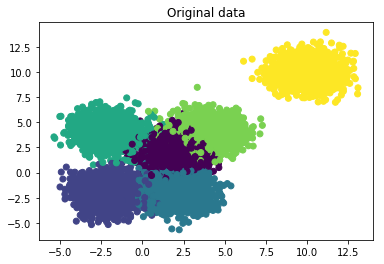

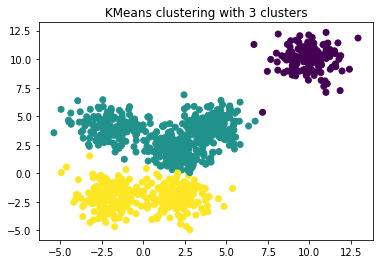

Comparing k-means clusters against the data:
col_0    0    1    2    3    4    5
row_0                              
0        0    0    0    0    1  153
1      173    0    5  168  164    0
2        3  186  146    1    0    0
Number of estimated clusters: 6


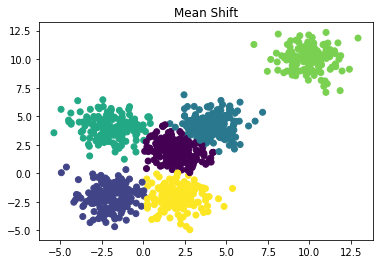

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5
row_0                              
0      161    0   10    3    0    2
1        0  182    0    0    0    4
2        5    4    0    0    0  142
3        1    0    0  168    0    0
4        8    0  157    0    0    0
5        0    0    0    0  153    0


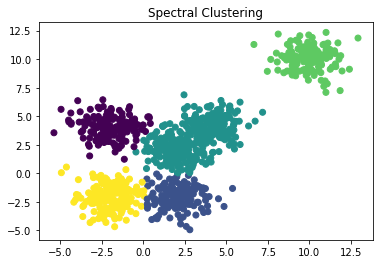

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        1    0  175    0    0
1        0    4    0    0  182
2        0  142    5    0    4
3      168    0    1    0    0
4        0    0  165    0    0
5        0    0    0  153    0
Done
Estimated number of clusters: 23


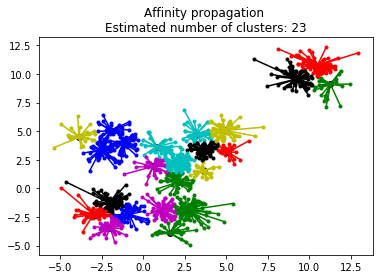

In [17]:
# data

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2,4], [4,4], [10,10]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)



# K-Means 

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X_train)
y_pred = km.predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=y_pred)
plt.title('KMeans clustering with 3 clusters')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))



# Mean shift

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=1000)

# bandwidth describes the surface it looks at - higher or 
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean Shift')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#For selecting Bandwidth, if the quantile is 0.1 then only we get 6 (original) clusters.  



# Spectral Clustering

from sklearn.cluster import SpectralClustering

# We know we're looking for five clusters. randomly chosen 
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))




# Affinity propagation 

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity propagation \nEstimated number of clusters: {}'.format(n_clusters_))
plt.show()


Affinity propagation comes up with way more clusters than needed. 


### Clustering with fewer blobs: 2


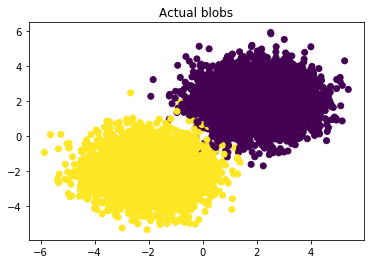

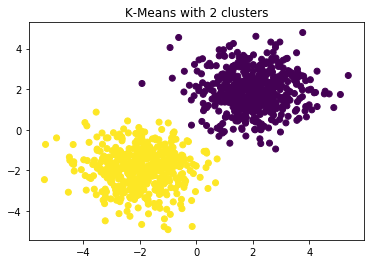

Starting Mean shift
Number of estimated clusters: 2


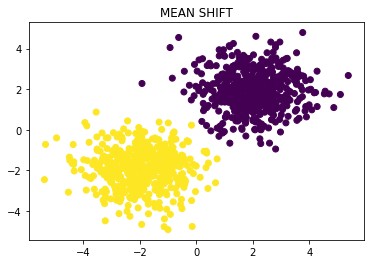

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486
total time for Mean Shift 0.6317129135131836
Starting Spectral Clustering...


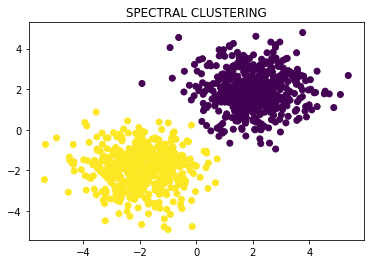

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486
Total time in Spectral Clustering 0.8986964225769043
Affinity Propagation starting...
Done
Estimated number of clusters: 222


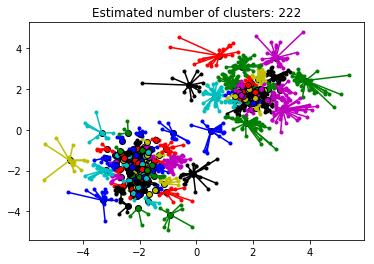

Total time 11.540769100189209


In [18]:
# data

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Actual blobs')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)



# K-Means 
km = KMeans(n_clusters=2)
km.fit(X_train)
y_pred = km.predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('K-Means with 2 clusters')
plt.show()



# Mean shift
print('Starting Mean shift')
st = t.time()
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('MEAN SHIFT')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))



# Spectral 
print('total time for Mean Shift {}'.format(t.time()-st))
print('Starting Spectral Clustering...')

st = t.time()
from sklearn.cluster import SpectralClustering

# user given clusters
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('SPECTRAL CLUSTERING')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))
print('Total time in Spectral Clustering {}'.format(t.time()-st))




from sklearn.cluster import AffinityPropagation
from sklearn import metrics
print('Affinity Propagation starting...')
st = t.time()

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

print('Total time {}'.format(t.time()-st))


### Clustering with 5 overlapping blobs


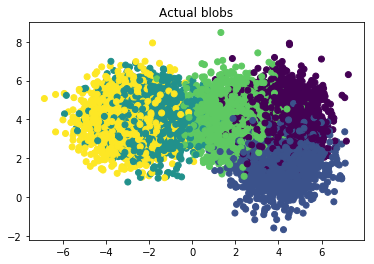

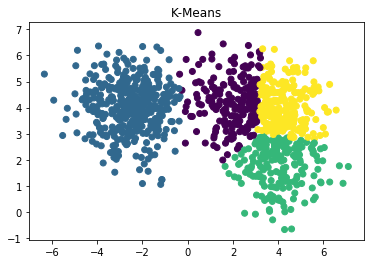

Starting Mean Shift...
Number of estimated clusters: 2


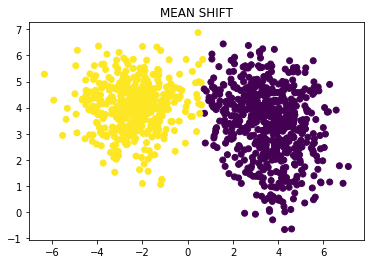

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      221    0
1      203    0
2        1  190
3      172   15
4        0  198
Total time in Mean Shift 0.4820239543914795
starting Spectral clustering


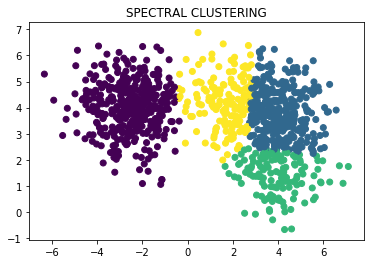

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  190    8   23
1        0   73  125    5
2      181    0    0   10
3        0   53    6  128
4      197    0    0    1
Total time in Spectral clustering 0.8146398067474365
Starting Affinity Propagation...
Done
Estimated number of clusters: 119


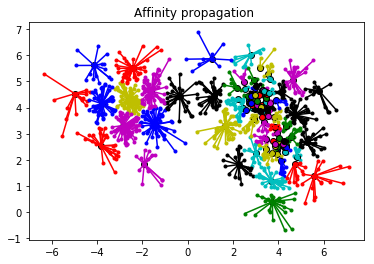

Total time in Affinity Propagation 9.599606990814209


In [20]:
# data

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[4, 4], [4, 2], [-2, 4], [2, 4], [-3,4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Actual blobs')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### Clustering methods 


# K-means 

km = KMeans(n_clusters=4)
km.fit(X_train)
y_pred = km.predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('K-Means')
plt.show()


# Mean shift
print('Starting Mean Shift...')
st = t.time()
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('MEAN SHIFT')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))
print('Total time in Mean Shift {}'.format(t.time()-st))




# Spectral 
print('starting Spectral clustering')
st = t.time()
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('SPECTRAL CLUSTERING')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))
print('Total time in Spectral clustering {}'.format(t.time()-st))

print('Starting Affinity Propagation...')
st = t.time()



# Affinity propagation 
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.title('Affinity propagation ')
plt.show()

print('Total time in Affinity Propagation {}'.format(t.time()-st))





### Clustering with far apart blobs


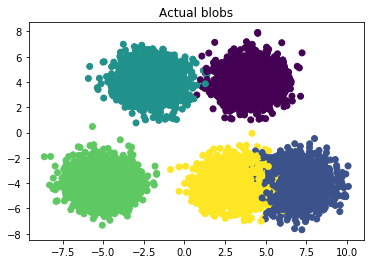

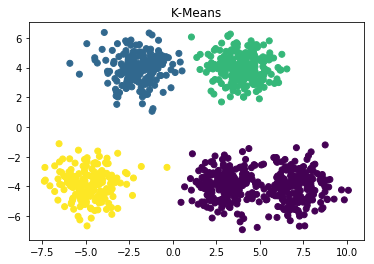

starting Mean Shift
Number of estimated clusters: 4


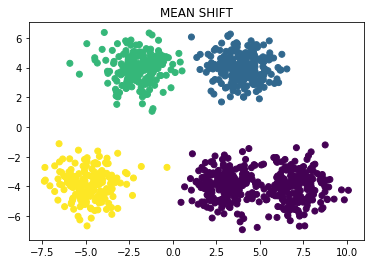

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  221    0    0
1      203    0    0    0
2        0    1  190    0
3        0    0    0  187
4      197    0    0    1
Total time in Mean shift 0.4402909278869629
starting Spectral clustering
we decided on clusters  3


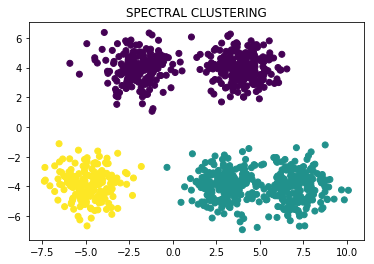

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      221    0    0
1        0  203    0
2      191    0    0
3        0    0  187
4        0  198    0
Total time in SPECTRAL CLUSTERING  1.0430328845977783
starting Affinity Propagation
Done
Estimated number of clusters: 16


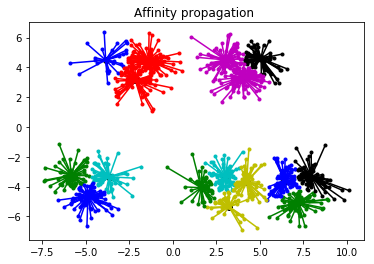

Total time in Affinity Propagation 8.096559047698975


In [21]:
# data

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[4, 4], [7, -4], [-2, 4], [-5, -4], [3,-4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Actual blobs')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)


### Clustering methods 

# K-means 

km = KMeans(n_clusters=4)
km.fit(X_train)
y_pred = km.predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('K-Means')
plt.show()

# Mean shift
print('starting Mean Shift')
st = t.time()
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2
                            , n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('MEAN SHIFT')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))
print('Total time in Mean shift', t.time()-st)


# Spectral 

print('starting Spectral clustering')
st = t.time()
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3
print('we decided on clusters ', n_clusters)

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('SPECTRAL CLUSTERING')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))
print('Total time in SPECTRAL CLUSTERING ', t.time()-st)

# Affinity propagation 
print('starting Affinity Propagation')
st = t.time()

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.title('Affinity propagation ')
plt.show()
print('Total time in Affinity Propagation', t.time()-st)

If the original clusters are far apart, then clustering seems to be working well. 